In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Para identificar anomalías, obtenga un resumen estadístico, o dicho de
otro modo, realice un análisis descriptivo de sus datos, comente.
2. Realice un análisis gráfico de las temperaturas máximas históricas, las
temperaturas de los dos días anteriores y la estimación del amigo, con
respecto a la fecha. Comente si hay anomalías.

In [43]:
df = pd.read_csv('CD - M5 AE6 - temps.csv')

In [4]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [6]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


<Axes: >

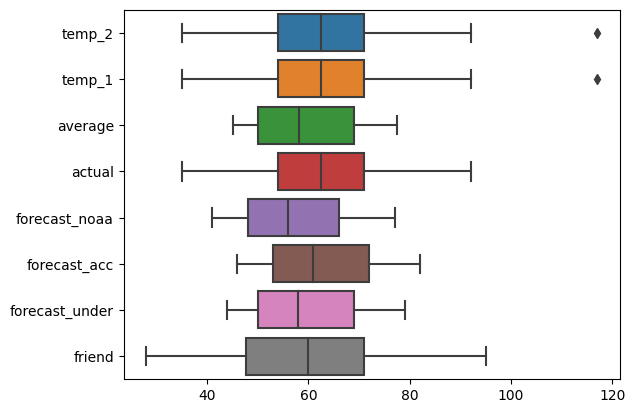

In [11]:
sns.boxplot(df.drop(columns=['year', 'month', 'day']), orient='h')

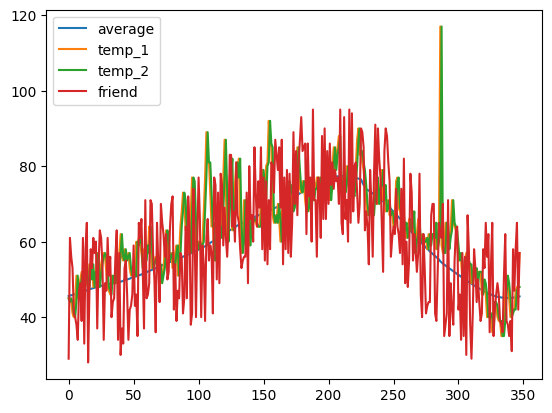

In [14]:


df.plot( y=['average', 'temp_1', 'temp_2', 'friend'], kind='line')

# Show the plot
plt.show()

Tenemos anomalías en temp_1 y temp_2

In [44]:

df = pd.get_dummies(df, columns=['week'], drop_first=True)  # drop_first=True para evitar la multicolinealidad



In [45]:
# tryin to predict the maximum actual temperature

df_list = list(df.copy().columns)
from sklearn.model_selection import train_test_split
labels = np.array(df['actual'])
df= df.drop('actual', axis = 1)
df = np.array(df)

train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)





In [46]:
baseline_preds = test_features[:, df_list.index('average')]

baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


In [47]:

from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_features, train_labels);

In [48]:
# testeamos la data
predictions = rf.predict(test_features)
# calculamos error
errors = abs(predictions - test_labels)
# error medio absuluto
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.81 degrees.


In [49]:
# error y precisión
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.01 %.


El modelo predice con un 94 % de precisión

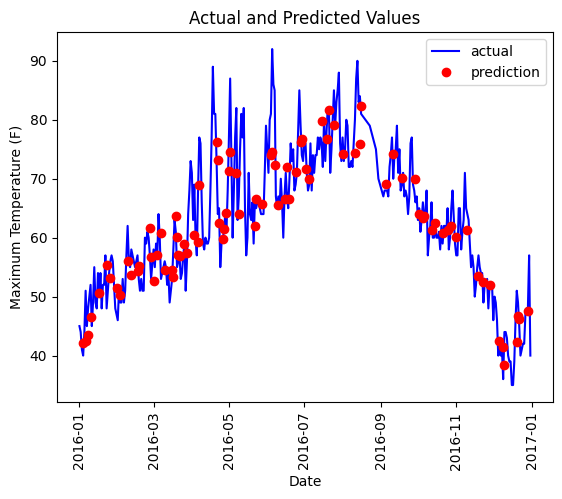

1.0

In [25]:
rf.score(x_test, y_test)

0.08045977011494253